#Regression using neural networks
* Find the `pima-diabetes.csv` file in the `./data/` folder.
* Can we predict `Age` knowing all other variables?

In [18]:
from google.colab import files
uploaded = files.upload()
file_name = "heart.csv"

Saving heart.csv to heart.csv


In [19]:
import pandas as pd
data = pd.read_csv(file_name, delimiter=',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
import numpy as np
dataset = np.genfromtxt(file_name, delimiter=",", skip_header = True) 

In [0]:
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [22]:
print('')
print(dataset.shape)
print('')
print(dataset[0:5])


(303, 14)

[[ 63.0  1.0  3.0  145.0  233.0  1.0  0.0  150.0  0.0  2.3  0.0  0.0  1.0
   1.0]
 [ 37.0  1.0  2.0  130.0  250.0  0.0  1.0  187.0  0.0  3.5  0.0  0.0  2.0
   1.0]
 [ 41.0  0.0  1.0  130.0  204.0  0.0  0.0  172.0  0.0  1.4  2.0  0.0  2.0
   1.0]
 [ 56.0  1.0  1.0  120.0  236.0  0.0  1.0  178.0  0.0  0.8  2.0  0.0  2.0
   1.0]
 [ 57.0  0.0  0.0  120.0  354.0  0.0  1.0  163.0  1.0  0.6  2.0  0.0  2.0
   1.0]]


In [0]:
# Select age as the output (Y)
Y = dataset[:, 0] 
# All others as the input (X)
X = dataset[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]

In [36]:
# Standardization
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std
print(X)

# Rescaling
Ymax = Y.max()
Y = Y / Ymax
print(Y)

[[ 0.68  1.97  0.76 ... -0.71 -2.15  0.91]
 [ 0.68  1.   -0.09 ... -0.71 -0.51  0.91]
 [-1.47  0.03 -0.09 ... -0.71 -0.51  0.91]
 ...
 [ 0.68 -0.94  0.71 ...  1.24  1.12 -1.09]
 [ 0.68 -0.94 -0.09 ...  0.27  1.12 -1.09]
 [-1.47  0.03 -0.09 ...  0.27 -0.51 -1.09]]
[0.82 0.48 0.53 0.73 0.74 0.74 0.73 0.57 0.68 0.74 0.7  0.62 0.64 0.83
 0.75 0.65 0.75 0.86 0.56 0.9  0.77 0.57 0.55 0.79 0.52 0.92 0.77 0.66
 0.84 0.69 0.53 0.84 0.57 0.7  0.66 0.6  0.7  0.7  0.84 0.84 0.66 0.62
 0.58 0.69 0.51 0.68 0.57 0.61 0.69 0.69 0.66 0.86 0.81 0.57 0.82 0.68
 0.62 0.58 0.44 0.74 0.92 0.7  0.68 0.53 0.75 0.45 0.66 0.58 0.57 0.81
 0.7  0.66 0.38 0.66 0.56 0.71 0.66 0.77 0.68 0.75 0.53 0.58 0.78 0.68
 0.55 0.87 0.88 0.6  0.7  0.75 0.62 0.74 0.68 0.7  0.58 0.69 0.81 0.68
 0.56 0.69 0.55 0.77 0.82 0.55 0.65 0.88 0.9  0.58 0.65 0.65 0.83 0.74
 0.83 0.56 0.71 0.48 0.53 0.73 0.6  0.6  0.83 0.77 0.53 0.7  0.51 0.44
 0.61 0.87 0.68 0.96 0.7  0.64 0.55 0.53 0.53 0.64 0.78 0.81 0.74 0.83
 0.66 0.56 0.55 0.87 0.99 

In [37]:
print(X.shape)
print(X[:5])

(303, 13)
[[ 0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71 -2.15
   0.91]
 [ 0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71 -0.51
   0.91]
 [-1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71 -0.51
   0.91]
 [ 0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71 -0.51
   0.91]
 [-1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71 -0.51
   0.91]]


In [38]:
print(Y[:5])

[0.82 0.48 0.53 0.73 0.74]


## Build a neural network

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim = 13, activation='linear'))

In [73]:
model.compile(loss='mean_squared_logarithmic_error', optimizer = 'rmsprop', metrics=['mse'])
model.fit(X, Y, epochs = 1024, verbose = 0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Assess the predictions

In [74]:
np.set_printoptions(precision = 2)
print ('True Data:')
print(Y[:10])
prediction = model.predict(X)
print ('Prediction:')
print(prediction[0:5].T)

True Data:
[0.82 0.48 0.53 0.73 0.74 0.74 0.73 0.57 0.68 0.74]
Prediction:
[[0.73 0.6  0.65 0.6  0.67]]


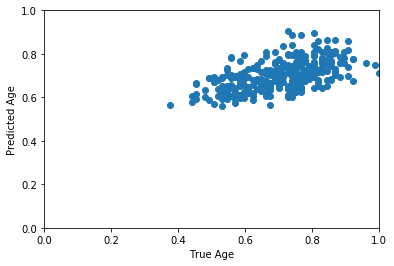

In [75]:
import matplotlib.pyplot as plt

plt.scatter(Y, prediction)
plt.ylabel('Predicted Age')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('True Age')
plt.show()

## Restore predictions (un-normalize)

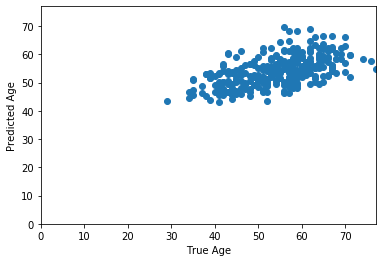

In [76]:
# Obtain the actual ages
Pactual = prediction.flatten() * Ymax
Yactual = Y.flatten() * Ymax

plt.scatter(Yactual, Pactual)
plt.ylabel('Predicted Age')
plt.xlim(0, Ymax)
plt.ylim(0, Ymax)
plt.xlabel('True Age')
plt.show()

# Quantitative evaluation of mode the model using MAE

In [0]:
diff = abs(Pactual - Yactual)

In [78]:
print(Yactual[:10])
print(Pactual[:10])
print(diff[:10])

[63. 37. 41. 56. 57. 57. 56. 44. 52. 57.]
[56.03 46.44 50.17 46.18 51.76 50.65 56.65 47.96 55.74 48.58]
[6.97 9.44 9.17 9.82 5.24 6.35 0.65 3.96 3.74 8.42]


In [79]:
diff.mean()

6.135501811213226

In [80]:
diff.std()

4.414646789658464

In [81]:
diff.max()

22.149059295654297

In [82]:
diff.min()

0.00029754638671875